<a href="https://colab.research.google.com/github/AlexanderVieira/training_datascience/blob/main/DR1_AT_AlexanderSilva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **INSTITUTO INFNET**
## **ENGENHARIA DE COMPUTAÇÃO**
## **Matemática para Data Science e Machine Learning**
## **ASSESSMENT**
## **ALUNO: ALEXANDER VIEIRA DA SILVA**

## **Importação de bibliotecas**

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
from scipy.stats import expon
from scipy.stats import poisson
import math

**1. Dê um exemplo de algoritmo supervisionado e explique, com suas palavras, que tipo de problema ele busca resolver.**

> Aprendizagem Naïve Bayes. Aborda o teorema de Bayes. Cria uma tabela de probabilidades. 
* Exemplo: Risco de crédito.
* O problema que esse algoritmo tenta resolver é a mineração de textos, ou seja, classificação de textos. 
* O algoritmo analisa a base dados histórica em busca de uma correlação entre os atributos previsores e a classe (rótulo), a fim de classificar ou predizer se há risco ao conceder crédito.

**2. Apresente a primeira etapa de uma análise de dados, segundo o modelo CRISP-DM.**

>**Entendimento do negócio:** consiste no entendimento do negócio com todo e encontrar perguntas sobre o negócio, ou seja, no estudo de caso identificar perguntas que o algoritmo possa responder, a fim de resolver determinado problema. 

**3. Apresente a importância da etapa de entendimento/conhecimento dos dados para a análise e modelagem de dados como um todo.**

>**Entendimento dos dados:** consiste na compreensão dos dados, ou seja, identificar tipos e estruturas, pois atualmente, há um grande volume de dados de variados tipos gerados por diferentes meios.

**4. Usando Python e os módulos Numpy, Pandas e Matplotlib, execute a série de tarefas pedidas a seguir e apresente o código completo da solução devidamente comentado em relação ao seu funcionamento:**

> a. Carregue a base que está no arquivo “Sensores.zip”. Faça todo e qualquer tratamento de dados que ache necessário para resolver os itens a seguir.<br/>
b. Crie histogramas dos dados das colunas temperatura e umidade usando o módulo Matplotlib.<br/>
c. Crie uma função de filtro que elimine as observações com as 5% maiores leituras e as 5% menores leituras das colunas referentes aos dados coletados pelos sensores de temperatura e umidade. A função criada deve ser aplicada de forma vetorizada.<br/>
d. Crie novos histogramas dos dados das colunas temperatura e umidade usando o módulo Matplotlib, após a operação de limpeza do item anterior.<br/>
e. Compare os histogramas para as duas variáveis e apresente sua opinião sobre as eventuais diferenças entre eles. O que aconteceu? Qual foi o impacto da eliminação de dados extremos para cada uma das leituras?
Sensores.zip

##**a. Carga do Dataset**

In [126]:
dataset = pd.read_csv('/content/dataset.csv')
dataset.head()

,ID,Datetime,Temperature,Humidity,Pressure,Co2 Gas,PM2.5,PM10,Daytime
0,0,"Mon, 20 May 2019 19:08:34 GMT",23.005257,33.060454,972.784433,626,3.8,8.8,Night
1,1,"Mon, 20 May 2019 19:08:35 GMT",22.989942,33.095483,972.844471,627,3.8,8.9,Night
2,2,"Mon, 20 May 2019 19:08:36 GMT",23.000152,33.080467,972.804446,627,3.8,8.9,Night
3,3,"Mon, 20 May 2019 19:08:36 GMT",22.989942,33.105487,972.732905,626,3.8,8.9,Night
4,4,"Mon, 20 May 2019 19:08:37 GMT",22.995047,33.105482,972.768675,626,3.7,8.3,Night


## **Detalhamento da base de dados**

In [127]:
dataset.tail()

,ID,Datetime,Temperature,Humidity,Pressure,Co2 Gas,PM2.5,PM10,Daytime
4095,4995,"Tue, 21 May 2019 07:01:54 GMT",26.109148,23.037656,971.945149,620,92.1,113.6,Day
4096,4996,"Tue, 21 May 2019 07:01:55 GMT",26.119359,23.037405,971.960844,620,91.9,112.5,Day
4097,4997,"Tue, 21 May 2019 07:01:57 GMT",26.119359,23.047509,971.932814,619,91.6,112.4,Day
4098,4998,"Tue, 21 May 2019 07:01:59 GMT",26.129569,23.072517,972.004570,618,90.1,111.3,Day
4099,4999,"Tue, 21 May 2019 07:02:00 GMT",26.129569,23.107879,971.948508,618,89.6,110.9,Day


In [128]:
dataset.describe()

,ID,Temperature,Humidity,Pressure,Co2 Gas,PM2.5,PM10
count,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000
mean,2708.036585,25.495766,26.717673,972.445216,585.630732,31.674317,43.349195
std,1511.553258,1.544276,4.647934,2.133553,70.648084,117.932525,146.484405
min,0.000000,22.877633,19.940209,971.496321,202.000000,3.400000,6.100000
25%,1024.750000,23.010362,23.672215,972.151132,536.000000,4.600000,9.500000
50%,2949.500000,26.313355,24.397101,972.418327,545.000000,4.900000,10.800000
75%,3974.250000,26.497142,33.548111,972.716458,629.000000,5.300000,12.400000
max,4999.000000,27.640713,43.001648,1107.566634,1015.000000,913.000000,1238.000000


In [129]:
np.median(dataset['Temperature'])

26.31335533

In [130]:
dataset.dtypes

ID               int64
Datetime        object
Temperature    float64
Humidity       float64
Pressure       float64
Co2 Gas          int64
PM2.5          float64
PM10           float64
Daytime         object
dtype: object

In [131]:
dataset.isnull().sum()

ID             0
Datetime       0
Temperature    0
Humidity       0
Pressure       0
Co2 Gas        0
PM2.5          0
PM10           0
Daytime        0
dtype: int64

## **Nova base de dados com os atributos temperatura e umidade**

In [132]:
dataset_copy = { 'Temperature': dataset['Temperature'], 'Humidity': dataset['Humidity']}
dataset_copy

{'Humidity': 0       33.060454
 1       33.095483
 2       33.080467
 3       33.105487
 4       33.105482
           ...    
 4095    23.037656
 4096    23.037405
 4097    23.047509
 4098    23.072517
 4099    23.107879
 Name: Humidity, Length: 4100, dtype: float64, 'Temperature': 0       23.005257
 1       22.989942
 2       23.000152
 3       22.989942
 4       22.995047
           ...    
 4095    26.109148
 4096    26.119359
 4097    26.119359
 4098    26.129569
 4099    26.129569
 Name: Temperature, Length: 4100, dtype: float64}

In [133]:
data_new = pd.DataFrame(dataset_copy)
data_new

,Temperature,Humidity
0,23.005257,33.060454
1,22.989942,33.095483
2,23.000152,33.080467
3,22.989942,33.105487
4,22.995047,33.105482
...,...,...
4095,26.109148,23.037656
4096,26.119359,23.037405
4097,26.119359,23.047509
4098,26.129569,23.072517


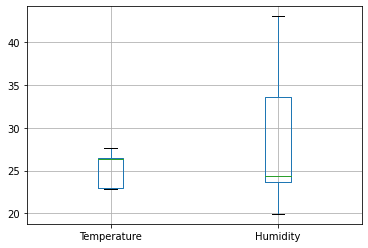

In [134]:
data_new.boxplot()

## **b. Histograma de cada atributo - base original**

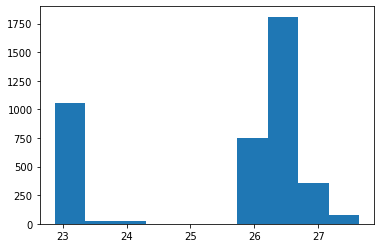

In [135]:
plt.hist(x = dataset['Temperature']);

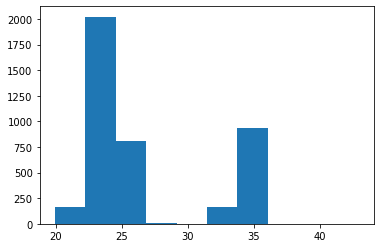

In [136]:
plt.hist(x = dataset['Humidity']);

- Backup do Dataset

In [137]:
dataset_backup = dataset.copy()  

## **c. Funções de filtro vetorizadas**

In [138]:
def create_col(collection): 
  dataset_backup = dataset.copy()  
  for i in range(len(collection)):
    dataset_backup[collection[i] + '_Filtered'] = (dataset_backup[collection[i]] > np.percentile(dataset_backup[collection[i]], 5)) & (dataset_backup[collection[i]] < np.percentile(dataset_backup[collection[i]], 95))  
  dataset_backup = dataset_backup[(dataset_backup.Temperature_Filtered == True) & (dataset_backup.Humidity_Filtered == True)]
  return dataset_backup

In [139]:
def function1(x):
  if (x > np.percentile(dataset['Temperature'], 5)) & (x < np.percentile(dataset['Temperature'], 95)):
    return True
  else:
    return False 

In [140]:
def function2(x):
  if (x > np.percentile(dataset['Humidity'], 5)) & (x < np.percentile(dataset['Humidity'], 95)):
    return True
  else:
    return False 

In [141]:
def function3(ds):  
  ds = ds[(ds.Temperature_Filtered == True) & (ds.Humidity_Filtered == True)]
  return ds

## **- Aplicação dos filtros com função apply do pandas**

In [142]:
dataset_backup['Temperature_Filtered'] = dataset_backup['Temperature'].apply(function1)
dataset_backup

,ID,Datetime,Temperature,Humidity,Pressure,Co2 Gas,PM2.5,PM10,Daytime,Temperature_Filtered
0,0,"Mon, 20 May 2019 19:08:34 GMT",23.005257,33.060454,972.784433,626,3.8,8.8,Night,True
1,1,"Mon, 20 May 2019 19:08:35 GMT",22.989942,33.095483,972.844471,627,3.8,8.9,Night,True
2,2,"Mon, 20 May 2019 19:08:36 GMT",23.000152,33.080467,972.804446,627,3.8,8.9,Night,True
3,3,"Mon, 20 May 2019 19:08:36 GMT",22.989942,33.105487,972.732905,626,3.8,8.9,Night,True
4,4,"Mon, 20 May 2019 19:08:37 GMT",22.995047,33.105482,972.768675,626,3.7,8.3,Night,True
...,...,...,...,...,...,...,...,...,...,...
4095,4995,"Tue, 21 May 2019 07:01:54 GMT",26.109148,23.037656,971.945149,620,92.1,113.6,Day,True
4096,4996,"Tue, 21 May 2019 07:01:55 GMT",26.119359,23.037405,971.960844,620,91.9,112.5,Day,True
4097,4997,"Tue, 21 May 2019 07:01:57 GMT",26.119359,23.047509,971.932814,619,91.6,112.4,Day,True
4098,4998,"Tue, 21 May 2019 07:01:59 GMT",26.129569,23.072517,972.004570,618,90.1,111.3,Day,True


In [143]:
dataset_backup['Humidity_Filtered'] = dataset_backup['Humidity'].apply(function2)
dataset_backup

,ID,Datetime,Temperature,Humidity,Pressure,Co2 Gas,PM2.5,PM10,Daytime,Temperature_Filtered,Humidity_Filtered
0,0,"Mon, 20 May 2019 19:08:34 GMT",23.005257,33.060454,972.784433,626,3.8,8.8,Night,True,True
1,1,"Mon, 20 May 2019 19:08:35 GMT",22.989942,33.095483,972.844471,627,3.8,8.9,Night,True,True
2,2,"Mon, 20 May 2019 19:08:36 GMT",23.000152,33.080467,972.804446,627,3.8,8.9,Night,True,True
3,3,"Mon, 20 May 2019 19:08:36 GMT",22.989942,33.105487,972.732905,626,3.8,8.9,Night,True,True
4,4,"Mon, 20 May 2019 19:08:37 GMT",22.995047,33.105482,972.768675,626,3.7,8.3,Night,True,True
...,...,...,...,...,...,...,...,...,...,...,...
4095,4995,"Tue, 21 May 2019 07:01:54 GMT",26.109148,23.037656,971.945149,620,92.1,113.6,Day,True,True
4096,4996,"Tue, 21 May 2019 07:01:55 GMT",26.119359,23.037405,971.960844,620,91.9,112.5,Day,True,True
4097,4997,"Tue, 21 May 2019 07:01:57 GMT",26.119359,23.047509,971.932814,619,91.6,112.4,Day,True,True
4098,4998,"Tue, 21 May 2019 07:01:59 GMT",26.129569,23.072517,972.004570,618,90.1,111.3,Day,True,True


In [144]:
ds_out = function3(dataset_backup)
ds_out

,ID,Datetime,Temperature,Humidity,Pressure,Co2 Gas,PM2.5,PM10,Daytime,Temperature_Filtered,Humidity_Filtered
0,0,"Mon, 20 May 2019 19:08:34 GMT",23.005257,33.060454,972.784433,626,3.8,8.8,Night,True,True
1,1,"Mon, 20 May 2019 19:08:35 GMT",22.989942,33.095483,972.844471,627,3.8,8.9,Night,True,True
2,2,"Mon, 20 May 2019 19:08:36 GMT",23.000152,33.080467,972.804446,627,3.8,8.9,Night,True,True
3,3,"Mon, 20 May 2019 19:08:36 GMT",22.989942,33.105487,972.732905,626,3.8,8.9,Night,True,True
4,4,"Mon, 20 May 2019 19:08:37 GMT",22.995047,33.105482,972.768675,626,3.7,8.3,Night,True,True
...,...,...,...,...,...,...,...,...,...,...,...
4095,4995,"Tue, 21 May 2019 07:01:54 GMT",26.109148,23.037656,971.945149,620,92.1,113.6,Day,True,True
4096,4996,"Tue, 21 May 2019 07:01:55 GMT",26.119359,23.037405,971.960844,620,91.9,112.5,Day,True,True
4097,4997,"Tue, 21 May 2019 07:01:57 GMT",26.119359,23.047509,971.932814,619,91.6,112.4,Day,True,True
4098,4998,"Tue, 21 May 2019 07:01:59 GMT",26.129569,23.072517,972.004570,618,90.1,111.3,Day,True,True


In [145]:
ds_drop = ds_out.drop(columns=['Temperature_Filtered'])
ds_drop

,ID,Datetime,Temperature,Humidity,Pressure,Co2 Gas,PM2.5,PM10,Daytime,Humidity_Filtered
0,0,"Mon, 20 May 2019 19:08:34 GMT",23.005257,33.060454,972.784433,626,3.8,8.8,Night,True
1,1,"Mon, 20 May 2019 19:08:35 GMT",22.989942,33.095483,972.844471,627,3.8,8.9,Night,True
2,2,"Mon, 20 May 2019 19:08:36 GMT",23.000152,33.080467,972.804446,627,3.8,8.9,Night,True
3,3,"Mon, 20 May 2019 19:08:36 GMT",22.989942,33.105487,972.732905,626,3.8,8.9,Night,True
4,4,"Mon, 20 May 2019 19:08:37 GMT",22.995047,33.105482,972.768675,626,3.7,8.3,Night,True
...,...,...,...,...,...,...,...,...,...,...
4095,4995,"Tue, 21 May 2019 07:01:54 GMT",26.109148,23.037656,971.945149,620,92.1,113.6,Day,True
4096,4996,"Tue, 21 May 2019 07:01:55 GMT",26.119359,23.037405,971.960844,620,91.9,112.5,Day,True
4097,4997,"Tue, 21 May 2019 07:01:57 GMT",26.119359,23.047509,971.932814,619,91.6,112.4,Day,True
4098,4998,"Tue, 21 May 2019 07:01:59 GMT",26.129569,23.072517,972.004570,618,90.1,111.3,Day,True


In [146]:
ds_drop1 = ds_drop.drop(columns=['Humidity_Filtered'])
ds_drop1

,ID,Datetime,Temperature,Humidity,Pressure,Co2 Gas,PM2.5,PM10,Daytime
0,0,"Mon, 20 May 2019 19:08:34 GMT",23.005257,33.060454,972.784433,626,3.8,8.8,Night
1,1,"Mon, 20 May 2019 19:08:35 GMT",22.989942,33.095483,972.844471,627,3.8,8.9,Night
2,2,"Mon, 20 May 2019 19:08:36 GMT",23.000152,33.080467,972.804446,627,3.8,8.9,Night
3,3,"Mon, 20 May 2019 19:08:36 GMT",22.989942,33.105487,972.732905,626,3.8,8.9,Night
4,4,"Mon, 20 May 2019 19:08:37 GMT",22.995047,33.105482,972.768675,626,3.7,8.3,Night
...,...,...,...,...,...,...,...,...,...
4095,4995,"Tue, 21 May 2019 07:01:54 GMT",26.109148,23.037656,971.945149,620,92.1,113.6,Day
4096,4996,"Tue, 21 May 2019 07:01:55 GMT",26.119359,23.037405,971.960844,620,91.9,112.5,Day
4097,4997,"Tue, 21 May 2019 07:01:57 GMT",26.119359,23.047509,971.932814,619,91.6,112.4,Day
4098,4998,"Tue, 21 May 2019 07:01:59 GMT",26.129569,23.072517,972.004570,618,90.1,111.3,Day


In [147]:
ds_drop1.describe()

,ID,Temperature,Humidity,Pressure,Co2 Gas,PM2.5,PM10
count,3274.000000,3274.000000,3274.000000,3274.000000,3274.000000,3274.000000,3274.000000
mean,2776.353085,25.673995,26.241287,972.456048,574.190287,33.219090,45.375229
std,1340.757343,1.375186,4.103585,2.378786,66.669489,129.403252,161.055364
min,0.000000,22.933787,22.405110,971.496321,504.000000,3.500000,6.100000
25%,2149.250000,25.996834,23.852721,972.209822,534.000000,4.600000,9.500000
50%,2967.500000,26.333776,24.377693,972.413835,542.000000,4.900000,10.800000
75%,3785.750000,26.486932,25.492404,972.636554,627.000000,5.200000,12.200000
max,4999.000000,26.885138,34.490600,1107.566634,994.000000,913.000000,1238.000000


In [148]:
np.median(ds_drop1['Temperature'])

26.33377606

## **d. Novo histograma após aplicação dos filtros**

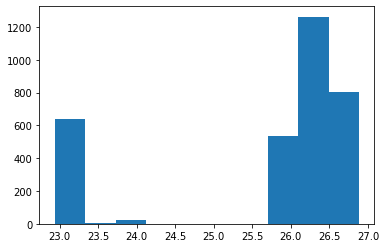

In [149]:
plt.hist(x = ds_drop1['Temperature']);

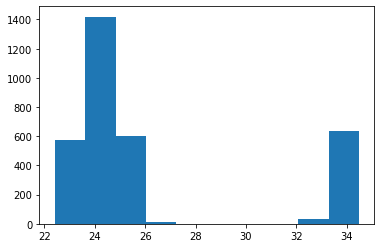

In [150]:
plt.hist(x = ds_drop1['Humidity']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



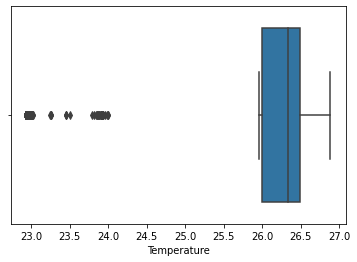

In [151]:
sns.boxplot(ds_drop1['Temperature']);

In [152]:
dataset_scatter = dataset.copy()
dataset_scatter = dataset_scatter.iloc[:,[2, 3, 4]]
dataset_scatter

,Temperature,Humidity,Pressure
0,23.005257,33.060454,972.784433
1,22.989942,33.095483,972.844471
2,23.000152,33.080467,972.804446
3,22.989942,33.105487,972.732905
4,22.995047,33.105482,972.768675
...,...,...,...
4095,26.109148,23.037656,971.945149
4096,26.119359,23.037405,971.960844
4097,26.119359,23.047509,971.932814
4098,26.129569,23.072517,972.004570


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94f6582a90>,
      dtype=object)

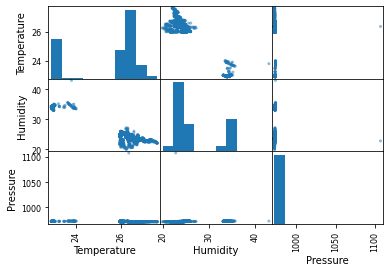

In [153]:
pd.plotting.scatter_matrix(dataset_scatter)

## **e. Resposta**

> - Ao analisar a base de dados após aplicação dos filtros, apresentou outliers, bem como uma redução significativa dos dados e número de ocorrências, fugindo do padrão inicial, além disso o desvio padrão sofreu uma pequena redução.

**5. Você importa uma base de dados e percebe, ao fazer um boxplot das variáveis, que uma delas apresenta outliers. Qual medida de tendência central você utilizaria para representar esta variável a partir de uma estatística única?**

> - Considerando o cenário apresentado, pode-se utilizar como medida de tendência central a **mediana**, visto que é menos sensível a "outliers", além disso os dados podem estar dispersos comparado com o padrão, tanto abaixo da faixa que representa o valor mínimo quanto a faixa do valor máximo. 

**6. Continuando a análise da questão 5, você cria um histograma de outra das variáveis e identifica que ele apresenta um contorno de distribuição normal, porém com uma curva baixa e bem larga. Apresente sua expectativa sobre a variância desta variável e sua justificativa.**

> - Minha expectativa analisando o gráfico dessa função com contorno de uma distribuição normal é que a probabilidade da ocorrência de um evento extraordinário acontecerá mais rápido, comparado com outras distribuições, ou seja, quanto mais próximo de zero ou do +INF, mais distante o valor ficará da medida de tendência central, dessa forma, o desvio padrão é incrementado.  

## **- Exemplo:**

In [154]:
dados_normal = stats.norm.rvs(size = 1000, random_state = 1)

In [155]:
min(dados_normal), max(dados_normal)

(-3.053764380426305, 3.9586027040379634)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



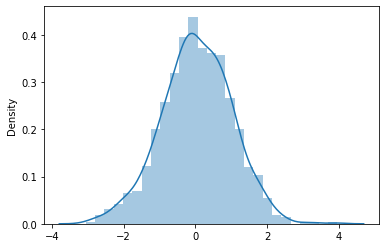

In [156]:
sns.distplot(dados_normal, hist = True, kde = True);

In [157]:
dados_normal.mean(), np.median(dados_normal), stats.mode(dados_normal), np.var(dados_normal), np.std(dados_normal)

(0.03881247615960185,
 0.04129258886921605,
 ModeResult(mode=array([-3.05376438]), count=array([1])),
 0.9623691107920885,
 0.9810041339322116)

In [158]:
np.sum(((dados_normal >= 0.9810041339322116) & (dados_normal <= 0.9810041339322116 + 1)))

148

In [159]:
np.sum(((dados_normal <= 0.9810041339322116) & (dados_normal >= 0.9810041339322116 - 1)))

353

In [160]:
(148 + 353) / 1000

0.501

**7. Pesquise e apresente um exemplo de dado onde podemos esperar um comportamento aproximado por uma distribuição exponencial.**


> - É um tipo da distribuição gama
- Tempo de vida de certos produtos e materiais
- Tempo de vida de óleos isolantes e dielétricos, entre outros

## **- Exemplo:**

In [161]:
dados_exponencial = expon.rvs(size = 1000)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



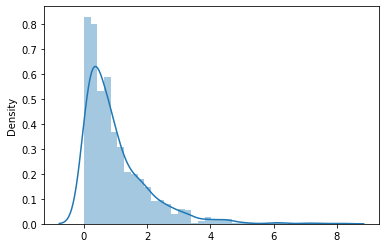

In [162]:
sns.distplot(dados_exponencial);

In [163]:
min(dados_exponencial), max(dados_exponencial)

(0.00045964964113827145, 8.07045561307588)

**8. Pesquise e apresente um exemplo de uso da distribuição de Poisson relacionado à área de TI.**

> - Número de vezes que um evento aconteceu em um intervalo de tempo
- Exemplo: número de usuários que visitaram um website em um intervalo
- Quantidade de vezes que um evento aconteceu nesse intervalo (número de ligações em um call center)

## **- Exemplo:**

In [164]:
dados_poisson = poisson.rvs(size = 1000, mu = 1)

In [165]:
min(dados_poisson), max(dados_poisson)

(0, 6)

In [166]:
np.unique(dados_poisson, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([363, 364, 193,  61,  11,   7,   1]))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



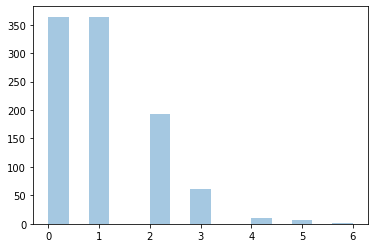

In [167]:
sns.distplot(dados_poisson, kde=False);

**9. Para os itens a seguir, carregue a base ‘MTCARS’, que está no arquivo “Carros.zip”. Utilize Python e os módulos Numpy, Pandas e Matplotlib para respondê-los. Entregue os códigos criados para resolução, comentados, juntamente com a resposta pedida em seu PDF de entrega.**

a. Apresente um boxplot da variável HP.<br/> 
b. A partir do boxplot do item 9.a, diga se existem outliers nesta variável.<br/>
c. Apresente uma matriz de diagramas de dispersão entre as variáveis MPG, HP, DRAT e WT.<br/>
d. Finalmente, explique o relacionamento entre as variáveis MPG e HP, a partir do gráfico do item 9.c.
Carros.zip

##**a. Carga do Dataset**

In [168]:
dataset_mtcar = pd.read_csv('/content/mtcars.csv')
dataset_mtcar.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [169]:
dataset_mtcar.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [170]:
dataset_mtcar.tail()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


## **Detalhamento da base de dados**

In [171]:
dataset_mtcar.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [172]:
np.median(dataset_mtcar['hp']), np.mean(dataset_mtcar['hp']), np.var(dataset_mtcar['hp'])

(123.0, 146.6875, 4553.96484375)

## **a. Visualização com boxplot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



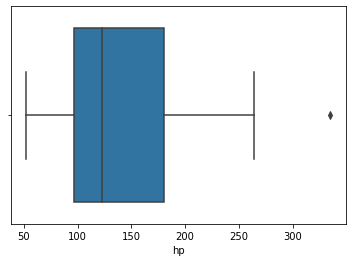

In [173]:
sns.boxplot(dataset_mtcar['hp']);

## **b. Resposta**

> - De acordo com o gráfico gerado pode-se afirmar que existe outlier, visto que existem dados fora do padrão acima da faixa que representa valores máximos no conjunto de dados.

## **c. Matriz Diagrama de Dispersão**

In [174]:
dataset_mtcar_copy = dataset_mtcar.iloc[:,[1, 4, 5, 6]]
dataset_mtcar_copy

,mpg,hp,drat,wt
0,21.0,110,3.90,2.620
1,21.0,110,3.90,2.875
2,22.8,93,3.85,2.320
3,21.4,110,3.08,3.215
4,18.7,175,3.15,3.440
5,18.1,105,2.76,3.460
6,14.3,245,3.21,3.570
7,24.4,62,3.69,3.190
8,22.8,95,3.92,3.150
9,19.2,123,3.92,3.440


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94f64b0d10>,
      dtype=object)

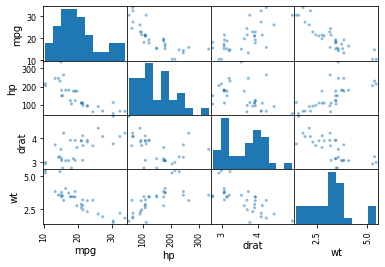

In [175]:
pd.plotting.scatter_matrix(dataset_mtcar_copy)

## **d. Resposta**

> - Analisando a matriz de dispersão pode-se afirmar que a correlação entre as variávies MPG e HP é negativa, ou seja, inversamente proporcional, visto que quanto maior o MPG menor o HP.

**10. Agora é com você! O arquivo “Parking_Birmingham.zip” contém uma base com dados de estacionamentos na área da cidade de Birmingham e um arquivo TXT com uma descrição das variáveis incluídas. A partir destas informações, e utilizando Python e os módulos Numpy, Pandas e Matplotlib, responda os itens a seguir.**

a. Importe a base de dados para um dataframe.<br/>
b. Apresente um gráfico de barras contendo a capacidade de cada um dos estacionamentos listados na base de dados.<br/>
c. Usando a base fornecida e tendo o suporte de visualizações de dados responda a pergunta “Qual o estacionamento com maior taxa de ocupação média aos sábados e aos domingos?”<br/>
d. Usando a base fornecida e tendo o suporte de visualizações de dados responda a pergunta “Em qual hora cheia do dia temos uma maior ocupação do estacionamento identificado como ‘BHMBCCMKT01’?” <br/>
- DICA: separe a informação de hora em uma nova coluna e agrupe os dados de ocupação por esta nova variável, aplicando a função de cálculo apropriada para responder a pergunta. Use apenas a informação de hora cheia, ignorando minutos, segundos e o dia específico da semana.

##**a. Carga do Dataset**

In [176]:
dataset_parking_birmingham = pd.read_csv('/content/Parking_Birmingham.csv')
dataset_parking_birmingham.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [177]:
dataset_parking_birmingham.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [178]:
dataset_parking_birmingham.tail()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
35712,Shopping,1920,1517,2016-12-19 14:30:33
35713,Shopping,1920,1487,2016-12-19 15:03:34
35714,Shopping,1920,1432,2016-12-19 15:29:33
35715,Shopping,1920,1321,2016-12-19 16:03:35
35716,Shopping,1920,1180,2016-12-19 16:30:35


- ## **Detalhamento da base de dados**

In [179]:
dataset_parking_birmingham.describe()

,Capacity,Occupancy
count,35717.000000,35717.000000
mean,1397.550130,642.228911
std,1179.326833,656.955535
min,220.000000,-8.000000
25%,500.000000,210.000000
50%,849.000000,446.000000
75%,2009.000000,798.000000
max,4675.000000,4327.000000


In [180]:
np.median(dataset_parking_birmingham['Capacity']), np.median(dataset_parking_birmingham['Occupancy'])

(849.0, 446.0)

## **- Remoção de Outliers**

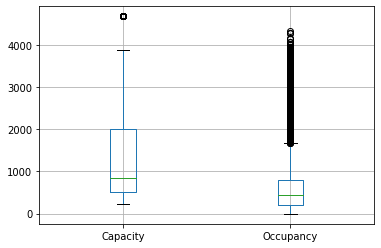

In [181]:
dataset_parking_birmingham.boxplot()

In [182]:
graphic_capacity = px.box(dataset_parking_birmingham, y='Capacity')
graphic_capacity.show()

In [183]:
outliers_capacity = dataset_parking_birmingham[(dataset_parking_birmingham['Capacity'] >= 220) & (dataset_parking_birmingham['Capacity'] <= 3883)]
outliers_capacity.describe()

,Capacity,Occupancy
count,34423.000000,34423.000000
mean,1274.347035,583.509485
std,1011.984369,565.441823
min,220.000000,-8.000000
25%,500.000000,205.000000
50%,849.000000,427.000000
75%,1920.000000,741.000000
max,3883.000000,3499.000000


In [184]:
graphic_capacity_new = px.box(outliers_capacity, y='Capacity')
graphic_capacity_new.show()

In [185]:
graphic_occupancy = px.box(dataset_parking_birmingham, y='Occupancy')
graphic_occupancy.show()

In [186]:
outliers_occupancy = dataset_parking_birmingham[(dataset_parking_birmingham['Occupancy'] >= 0) & (dataset_parking_birmingham['Occupancy'] <= 1345)]
outliers_occupancy.describe()

,Capacity,Occupancy
count,31996.000000,31996.000000
mean,1158.127672,462.179929
std,944.344207,330.451968
min,220.000000,0.000000
25%,496.000000,195.000000
50%,788.000000,391.000000
75%,1268.000000,654.000000
max,4675.000000,1345.000000


In [187]:
graphic_occupancy_new = px.box(outliers_occupancy, y='Occupancy')
graphic_occupancy_new.show()

## **b. Visualização Gráfico de Barras**

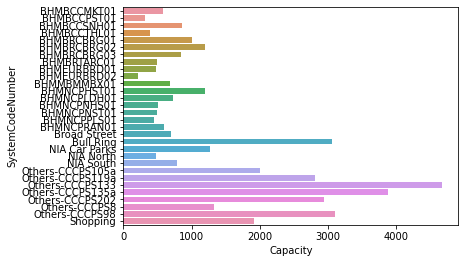

In [188]:
sns.barplot(x = 'Capacity', y = 'SystemCodeNumber', data=dataset_parking_birmingham);

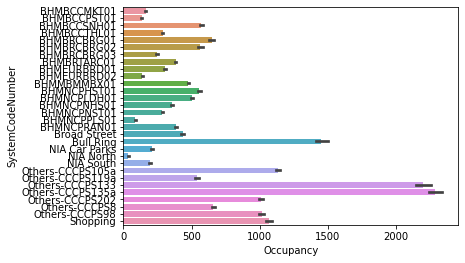

In [189]:
sns.barplot(x = 'Occupancy', y = 'SystemCodeNumber', data=dataset_parking_birmingham);

## **c. Preparação dos dados**

In [190]:
ds_birmingham = dataset_parking_birmingham.copy()
ds_birmingham.LastUpdated = pd.to_datetime(ds_birmingham.LastUpdated)
ds_birmingham['Day'] = ds_birmingham.LastUpdated.dt.dayofweek
ds1 = ds_birmingham[ds_birmingham['Day'] == 5]
ds1

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,Day
72,BHMBCCMKT01,577,58,2016-10-08 07:57:38,5
73,BHMBCCMKT01,577,61,2016-10-08 08:30:37,5
74,BHMBCCMKT01,577,75,2016-10-08 08:57:34,5
75,BHMBCCMKT01,577,104,2016-10-08 09:30:37,5
76,BHMBCCMKT01,577,158,2016-10-08 10:04:34,5
...,...,...,...,...,...
35676,Shopping,1920,1113,2016-12-17 14:30:19,5
35677,Shopping,1920,1153,2016-12-17 15:03:18,5
35678,Shopping,1920,1146,2016-12-17 15:30:19,5
35679,Shopping,1920,1112,2016-12-17 15:57:15,5


In [191]:
ds_capacity = ds1.groupby(['SystemCodeNumber'], as_index=False)['Capacity'].mean()
ds_capacity

,SystemCodeNumber,Capacity
0,BHMBCCMKT01,577
1,BHMBCCPST01,317
2,BHMBCCSNH01,863
3,BHMBCCTHL01,387
4,BHMBRCBRG01,1010
5,BHMBRCBRG02,1194
6,BHMBRCBRG03,849
7,BHMBRTARC01,496
8,BHMEURBRD01,470
9,BHMEURBRD02,220


## **c. Taxa de ocupação aos sábados**

In [192]:
ds_g = ds1.groupby(['SystemCodeNumber'], as_index=False)['Occupancy'].mean()
ds_g['%Rate'] = round((ds_g['Occupancy'] / ds_capacity['Capacity']) *  100, 2)
ds_g['Occupancy']= ds_g['Occupancy'].apply(lambda x: math.trunc(x))
ds_g

,SystemCodeNumber,Occupancy,%Rate
0,BHMBCCMKT01,275,47.72
1,BHMBCCPST01,201,63.66
2,BHMBCCSNH01,408,47.37
3,BHMBCCTHL01,282,72.91
4,BHMBRCBRG01,797,79.00
5,BHMBRCBRG02,753,63.07
6,BHMBRCBRG03,355,41.86
7,BHMBRTARC01,379,76.51
8,BHMEURBRD01,132,28.26
9,BHMEURBRD02,43,19.94


## **d. Preparação dos dados**

In [193]:
ds_weekday_sunday = dataset_parking_birmingham.copy()
ds_weekday_sunday.LastUpdated = pd.to_datetime(ds_weekday_sunday.LastUpdated)
ds_weekday_sunday['Day'] = ds_weekday_sunday.LastUpdated.dt.dayofweek
ds2 = ds_weekday_sunday[ds_weekday_sunday['Day'] == 6]
ds2

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,Day
90,BHMBCCMKT01,577,42,2016-10-09 08:04:40,6
91,BHMBCCMKT01,577,42,2016-10-09 08:30:45,6
92,BHMBCCMKT01,577,43,2016-10-09 09:04:46,6
93,BHMBCCMKT01,577,43,2016-10-09 09:30:45,6
94,BHMBCCMKT01,577,50,2016-10-09 09:57:41,6
...,...,...,...,...,...
35694,Shopping,1920,975,2016-12-18 14:30:27,6
35695,Shopping,1920,978,2016-12-18 14:56:25,6
35696,Shopping,1920,907,2016-12-18 15:30:24,6
35697,Shopping,1920,817,2016-12-18 16:03:27,6


## **c. Taxa de ocupação aos domingos**

In [194]:
ds_g2 = ds2.groupby(['SystemCodeNumber'], as_index=False)['Occupancy'].mean()
ds_g2['%Rate'] = round((ds_g2['Occupancy'] / ds_capacity['Capacity']) *  100, 2)
ds_g2['Occupancy']= ds_g2['Occupancy'].apply(lambda x: math.trunc(x))
ds_g2

,SystemCodeNumber,Occupancy,%Rate
0,BHMBCCMKT01,135,23.55
1,BHMBCCPST01,125,39.70
2,BHMBCCSNH01,379,43.98
3,BHMBCCTHL01,272,70.52
4,BHMBRCBRG01,664,65.79
5,BHMBRCBRG02,635,53.24
6,BHMBRCBRG03,220,25.94
7,BHMBRTARC01,372,75.03
8,BHMEURBRD01,114,24.32
9,BHMEURBRD02,31,14.21


## **d. Ocupação máxima por hora cheia**

In [195]:
ds3 = dataset_parking_birmingham.copy()
ds3.LastUpdated = pd.to_datetime(ds3.LastUpdated)
ds3['Hour'] = ds3.LastUpdated.dt.hour
ds3

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,Hour
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,7
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,8
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,8
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,9
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,9
...,...,...,...,...,...
35712,Shopping,1920,1517,2016-12-19 14:30:33,14
35713,Shopping,1920,1487,2016-12-19 15:03:34,15
35714,Shopping,1920,1432,2016-12-19 15:29:33,15
35715,Shopping,1920,1321,2016-12-19 16:03:35,16


In [196]:
ds4 = ds3[ds3['SystemCodeNumber'] == 'BHMBCCMKT01']
ds4

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,Hour
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,7
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,8
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,8
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,9
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,9
...,...,...,...,...,...
1307,BHMBCCMKT01,577,309,2016-12-19 14:30:33,14
1308,BHMBCCMKT01,577,300,2016-12-19 15:03:34,15
1309,BHMBCCMKT01,577,274,2016-12-19 15:29:33,15
1310,BHMBCCMKT01,577,230,2016-12-19 16:03:35,16


In [197]:
ds_g3 = ds4.groupby(['Hour'], as_index=False)['Occupancy'].max()
ds_g3

,Hour,Occupancy
0,7,61
1,8,80
2,9,150
3,10,283
4,11,370
5,12,428
6,13,508
7,14,573
8,15,567
9,16,543


## **Resposta**

In [198]:
ds_g3['Occupancy'].max()

573